#### Анализ данных и гипотезы часть_2

#### Дипломная работа по теме: "Изучение возможности расширения торгового направления в нишах медицинской, производственной и металлической мебели (на примере анализа ассортимента конкурентов, с целью дальнейшего составления рекомендаций собственникам бизнеса)". 


## Библиотеки и функции

In [ ]:
!pip install pandas-profiling[notebook]

In [3]:
#подключаем библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import scipy.stats as st
import math
mpl.style.use(['seaborn-v0_8-darkgrid']) #выбрали стиль
sns.set_style('darkgrid')

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
def missing_values_table(df): #смотрим пропущенные значения и их процент

    mis_val = df.isnull().sum() #с пропусками
    mis_val_percent = 100 * df.isnull().sum() / len(df) #процент с пропусками
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #объединение данных
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #переименовываем
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1) #сортируем по убыванию, выбираем данные =!0
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.") 
    return mis_val_table_ren_columns

def price_to_interval(param): #Распределяет цену в категории согласно 25, 50, 75, 85, 99 персентилям

  if param <= Q25:
    interval_price = '1: до ' + str(round(Q25, 0))
  elif Q25 < param <= Q50:
    interval_price = '2: до ' + str(round(Q50, 0))
  elif Q50< param <= Q75:
    interval_price = '3: до ' + str(round(Q75, 0))
  elif Q75 < param <= Q85:
    interval_price = '4: до ' + str(round(Q85, 0))
  elif Q85 < param <= Q99:
    interval_price = '5: до ' + str(round(Q99, 0))
  elif Q99 < param:
    interval_price = 'б: более ' + str(round(Q99, 0))
  else:
    interval_price = '0: значение не определено'

  return interval_price

def min_price(row):  # сравнивает цены по товару и выводит минимальную

  price_list = []
  for value in row:
    if type(value) is float:
      price_list.append(value)
  
  price_list = [x for x in price_list if str(x) != 'nan']
  if price_list != []:
    min_price = round(min(price_list), 2)
  else:
    min_price = np.nan
   
  return min_price

def max_price(row):  #сравнивает цены по товару и выводит максимальную

  price_list = []
  for value in row:
    if type(value) is float:
      price_list.append(value)
  
  price_list = [x for x in price_list if str(x) != 'nan']
  if price_list != []:
    max_price = round(max(price_list), 2)
  else:
    max_price = np.nan
   
  return max_price

def mean_price(row):  # сравнивает цены по товару и выводит среднюю

  price_list = []
  for value in row:
    if type(value) is float:
      price_list.append(value)
  
  price_list = [x for x in price_list if str(x) != 'nan']
  if price_list != []:
    mean_price = round(sum(price_list) / len(price_list), 2)
  else:
    mean_price = np.nan
   
  return mean_price

## Анализ совпадений

Наиболее интересными представляются данные по цене и по ассортименту организаций, поэтому данные всех 6 датасетов были дополнены колонкой “reduced” - сокращённым названием товара.

### Совпадения по ценам

In [5]:
df_only_match = pd.read_csv('all_only_match')

NameError: name 'pd' is not defined

In [6]:
df_only_match.sample(5)

NameError: name 'df_only_match' is not defined

In [7]:
df_only_match.iloc[[1498]]

NameError: name 'df_only_match' is not defined

In [8]:
df_only_match['min_price'] = df_only_match.apply(min_price, axis = 1) #минимальная цена товара

NameError: name 'df_only_match' is not defined

In [ ]:
df_only_match['max_price'] = df_only_match.apply(max_price, axis = 1) #максимальная цена товара

In [9]:
df_only_match['mean_price'] = df_only_match.apply(mean_price, axis = 1) #средняя цена товара

NameError: name 'df_only_match' is not defined

In [10]:
df_only_match.sample(5)

NameError: name 'df_only_match' is not defined

In [11]:
df_only_match.info()

NameError: name 'df_only_match' is not defined

* title_1 Название товара в орг.1
* reduced Сокращённое название
* price_1 Цена в орг.1
* title_2 Название товара в орг.2
* price_2 Цена в орг.2
* title_3 Название товара в орг.3
* price_3 Цена в орг.3
* title_4 Название товара в орг.4
* price_4 Цена в орг.4
* title_5 Название товара в орг.5
* price_5 Цена в орг.5
* min_price Минимальная цена на товар
* max_price Максимальная цена на товар
* mean_price Средняя цена на товар

In [3]:
df_only_match.describe()

NameError: name 'df_only_match' is not defined

In [4]:
missing_values_table(df_only_match)

NameError: name 'missing_values_table' is not defined

Менее всего пропусков у организации 2 и 3 - 40,7% и 43,0% соответсвенно. 

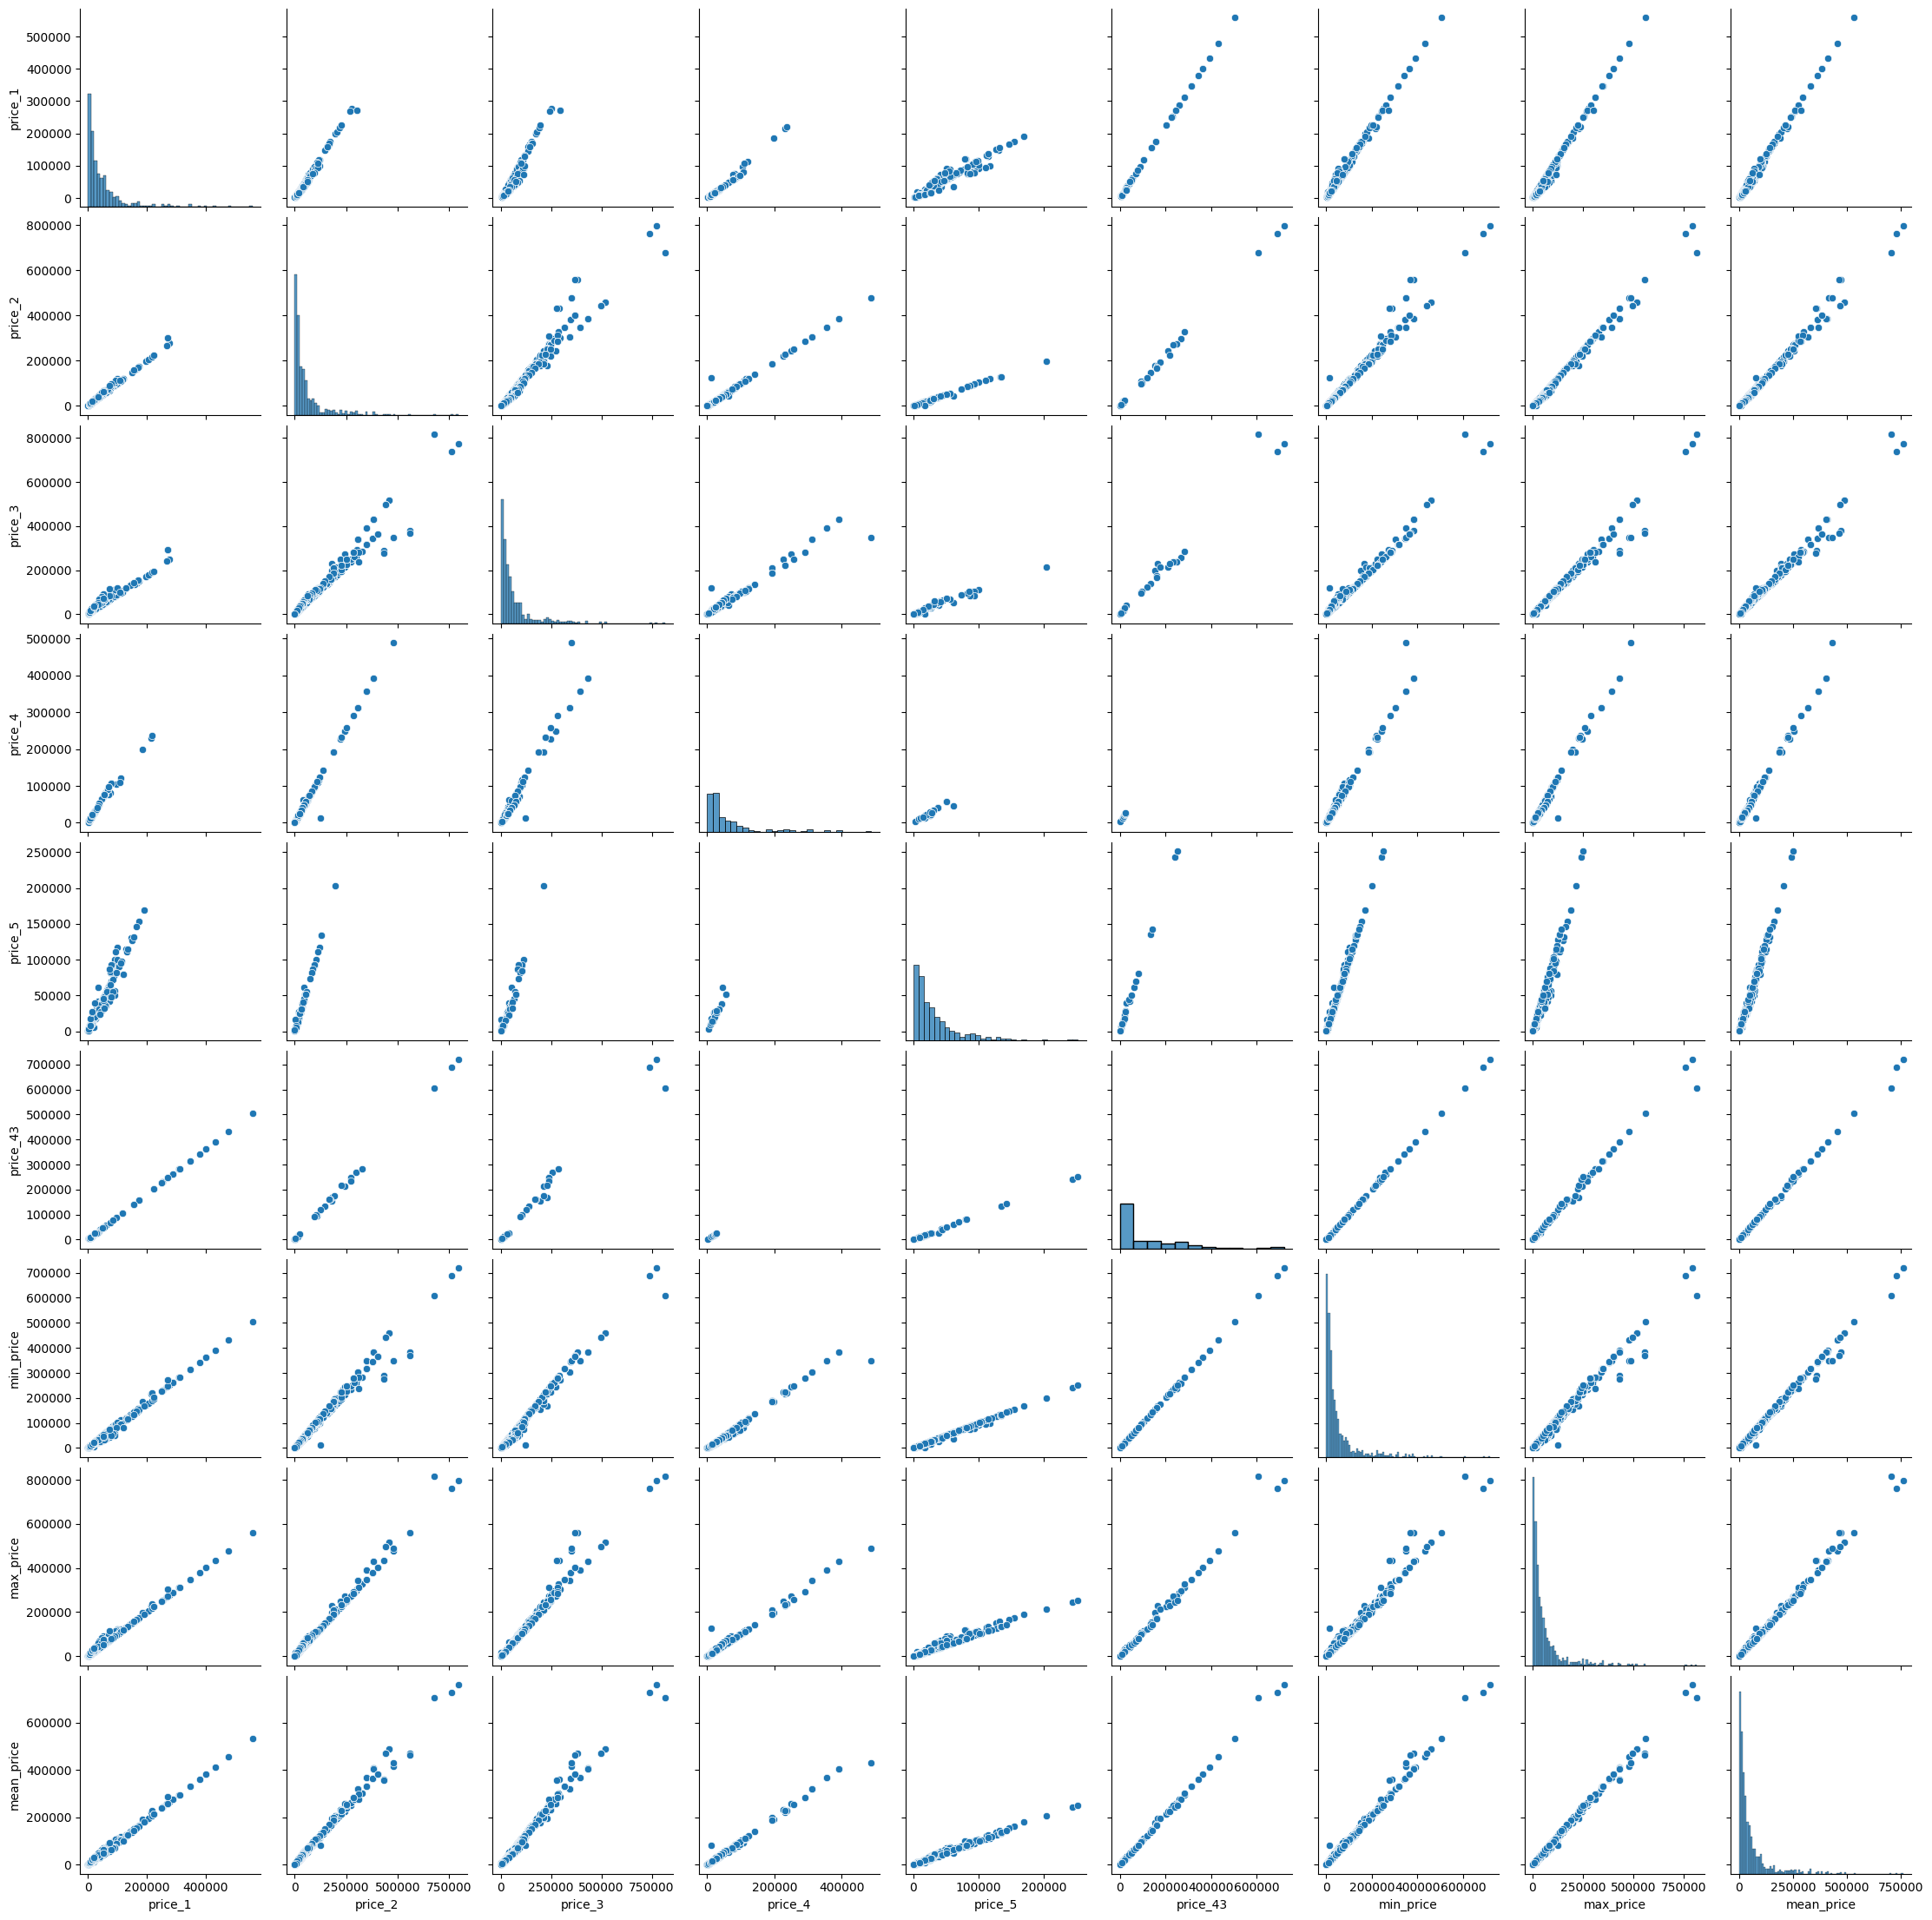

In [ ]:
sns.pairplot(df_only_match)

В целом все организации между собой имеют сильную линейную связь.

<ipython-input-25-75ac3d6bc739>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_only_match.corr(),


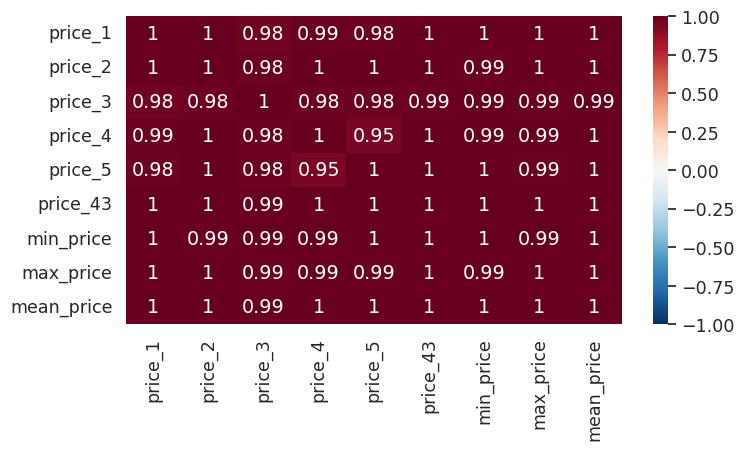

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_only_match.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Из приведённой корреляционной матрицы можно заметить сильную положительную связь между ценами рассматриваемых организаций.

In [ ]:
#вычисляем процент стоимости от максимальной цены для каждой орг-и
df_only_match['percent_from_max_1'] = df_only_match.apply(lambda x: x['price_1'] * 100 / x['max_price'] , axis= 1)
df_only_match['percent_from_max_2'] = df_only_match.apply(lambda x: x['price_2'] * 100 / x['max_price'] , axis= 1)
df_only_match['percent_from_max_3'] = df_only_match.apply(lambda x: x['price_3'] * 100 / x['max_price'] , axis= 1)
df_only_match['percent_from_max_4'] = df_only_match.apply(lambda x: x['price_4'] * 100 / x['max_price'] , axis= 1)
df_only_match['percent_from_max_5'] = df_only_match.apply(lambda x: x['price_5'] * 100 / x['max_price'] , axis= 1)

In [ ]:
df_only_match[['reduced', 'percent_from_max_1', 'percent_from_max_2', 'percent_from_max_3', 'percent_from_max_4', 'percent_from_max_5']].head() #проверяем

reduced  percent_from_max_1  percent_from_max_2  \
0    AIKO ЧИРОК 1018 (ВОРОБЕЙ)           88.156723                 NaN   
1              AIKO БЕРКУТ 144           88.651511           93.294075   
2              AIKO ЧИРОК 1312           85.338101           94.814694   
3    AIKO ЧИРОК 1015 (КОЛИБРИ)           88.155760                 NaN   
4              AIKO ФИЛИН 1443           95.010807          100.000000   

   percent_from_max_3  percent_from_max_4  percent_from_max_5  \
0                 NaN               100.0                 NaN   
1          100.000000                 NaN                 NaN   
2          100.000000                 NaN                 NaN   
3                 NaN               100.0                 NaN   
4           97.598463                 NaN                 NaN   

   percent_from_max_43  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

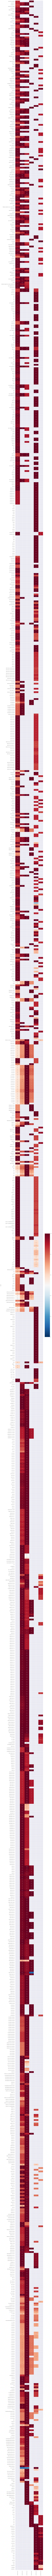

In [ ]:
sns.set(font_scale=0.5)
plt.figure(figsize=(8, 600))
sns.heatmap(
    df_only_match[['reduced', 'percent_from_max_1', 'percent_from_max_2', 'percent_from_max_3', 'percent_from_max_4', 'percent_from_max_5', 'percent_from_max_43']].set_index('reduced'),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=0, vmax=100); # указывает начало цветовых кодов от 0 до 100.

In [ ]:
df_only_match = pd.read_csv('all_only_match') #снова считываем файл, чтобы не было колонок с мин/макс ценой

In [ ]:
df_only_match.loc[:,'Row_Total'] = df_only_match.count(numeric_only=True, axis=1) #добавляем колонку с количеством совпадений (если есть цена) по товару

In [ ]:
df_only_match.sample(5)

title_1          reduced  price_1  \
1208                              NaN     ПРАКТИК M-18      NaN   
1495                              NaN           КБС-06      NaN   
554   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-052-02        ВЛ-052-02  50970.0   
199               ШКАФ МЕБЕЛЬНЫЙ ШМ-6             ШМ-6   5280.0   
376            СТЕЛЛАЖ СК 1064 (2060)   СК 1064 (2060)   9390.0   

                        title_2  price_2 title_3  price_3  \
1208  ОФИСНЫЙ ШКАФ ПРАКТИК M-18  13409.0     NaN      NaN   
1495                        NaN      NaN     NaN      NaN   
554                         NaN      NaN     NaN      NaN   
199                         NaN      NaN     NaN      NaN   
376                         NaN      NaN     NaN      NaN   

                        title_4  price_4                          title_5  \
1208  ОФИСНЫЙ ШКАФ ПРАКТИК M-18  13683.0                              NaN   
1495                        NaN      NaN        ШКАФ БУХГАЛТЕРСКИЙ КБС-06   
554                         NaN      NaN  ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-052-02   
199                         NaN      NaN          ШКАФ БУХГАЛТЕРСКИЙ ШМ-6   
376                         NaN      NaN           СТЕЛЛАЖ СК 1064 (2060)   

      price_5                   title_43  price_43  Row_Total  
1208      NaN                        NaN       NaN          2  
1495  17357.0  БУХГАЛТЕРСКИЙ ШКАФ КБС-06   19180.0          2  
554   33630.0                        NaN       NaN          2  
199    5300.0                        NaN       NaN          2  
376   10541.0                        NaN       NaN          2

In [ ]:
df_only_match.sort_values(by='Row_Total', ascending=False) #сортируем по убыванию

title_1              reduced  \
742                  ТУМБА ИНСТРУМЕНТАЛЬНАЯ WS-6                 WS-6   
680            ТЕЛЕЖКА ИНСТРУМЕНТАЛЬНАЯ WDS HARD             WDS HARD   
1380                                         NaN       ТС 1095-001030   
684                  ТУМБА ИНСТРУМЕНТАЛЬНАЯ WD-5                 WD-5   
612      ШКАФ ИНСТРУМЕНТАЛЬНЫЙ TC-1995/2-1220110    TC-1995/2-1220110   
...                                          ...                  ...   
785    ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 21.3Д.023            21.3Д.023   
784                              МОДУЛЬ М23-3 №3      МОДУЛЬ М23-3 №3   
783    ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 22.2Д.110            22.2Д.110   
782    ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 22.3Д.111            22.3Д.111   
795   МОДУЛЬНЫЙ ДРАЙВЕР ДЛЯ ХРАНЕНИЯ ИНСТРУМЕНТА           ДРАЙВЕР      

      price_1                                     title_2  price_2  \
742   34940.0                 ИНСТРУМЕНТАЛЬНАЯ ТУМБА WS-6  45415.0   
680   15430.0           ИНСТРУМЕНТАЛЬНАЯ ТЕЛЕЖКА WDS HARD  19518.0   
1380      NaN        ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ТС 1095-001030  32134.0   
684   11880.0                 ИНСТРУМЕНТАЛЬНАЯ ТУМБА WD-5  15439.0   
612   52940.0     ШКАФ ИНСТРУМЕНТАЛЬНЫЙ TC-1995/2-1220110  66967.0   
...       ...                                         ...      ...   
785       NaN                                         NaN      NaN   
784       NaN                                         NaN      NaN   
783       NaN                                         NaN      NaN   
782       NaN                                         NaN      NaN   
795       NaN  МОДУЛЬНЫЙ ДРАЙВЕР ДЛЯ ХРАНЕНИЯ ИНСТРУМЕНТА      NaN   

                                         title_3  price_3  \
742                  ИНСТРУМЕНТАЛЬНАЯ ТУМБА WS-6  54754.0   
680            ИНСТРУМЕНТАЛЬНАЯ ТЕЛЕЖКА WDS HARD  24575.0   
1380        ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ТС 1095-001030  44458.0   
684                  ИНСТРУМЕНТАЛЬНАЯ ТУМБА WD-5  23766.0   
612      ШКАФ ИНСТРУМЕНТАЛЬНЫЙ TC-1995/2-1220110  92339.0   
...                                          ...      ...   
785                                          NaN      NaN   
784                                          NaN      NaN   
783                                          NaN      NaN   
782                                          NaN      NaN   
795   МОДУЛЬНЫЙ ДРАЙВЕР ДЛЯ ХРАНЕНИЯ ИНСТРУМЕНТА      NaN   

                                      title_4  price_4  \
742               ТУМБА ИНСТРУМЕНТАЛЬНАЯ WS-6  45977.0   
680         ТЕЛЕЖКА ИНСТРУМЕНТАЛЬНАЯ WDS HARD  19610.0   
1380     ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ТС 1095-001030  34553.0   
684               ТУМБА ИНСТРУМЕНТАЛЬНАЯ WD-5  15479.0   
612   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ TC-1995/2-1220110  72007.0   
...                                       ...      ...   
785                                       NaN      NaN   
784                                       NaN      NaN   
783                                       NaN      NaN   
782                                       NaN      NaN   
795                                       NaN      NaN   

                                        title_5   price_5 title_43  price_43  \
742                  ПРОМЫШЛЕННЫЙ КОМПЛЕКТ WS-6   61549.0      NaN       NaN   
680           ТЕЛЕЖКА ИНСТРУМЕНТАЛЬНАЯ WDS HARD   18678.0      NaN       NaN   
1380       ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ТС 1095-001030   31098.0      NaN       NaN   
684                                         NaN       NaN      NaN       NaN   
612                                         NaN       NaN      NaN       NaN   
...                                         ...       ...      ...       ...   
785   ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 21.3Д.023   29596.0      NaN       NaN   
784                             МОДУЛЬ М23-3 №3  102504.0      NaN       NaN   
783   ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 22.2Д.110   23716.0      NaN       NaN   
782   ВЕРСТАК СЛЕСАРНЫЙ МЕТАЛЛИЧЕСКИЙ 22.3Д.111   36848.0      NaN       NaN   
795          

In [ ]:
df_only_match['Row_Total'].unique()

array([2, 3, 1, 4, 5, 0])

In [ ]:
pd.pivot_table(df_only_match, index='Row_Total', values='reduced', aggfunc='count')

reduced
Row_Total         
0                1
1               83
2              987
3              347
4               79
5                2

В основном совпадения попадаются в 2х, реже 3х организациях одновременно. Ассортимент не сильно перекликается между организациями.

### Совпадения по 2 и 3

In [ ]:
df_match_2_3 = df_only_match.drop(['title_1', 'price_1', 'title_4', 'price_4', 'title_5', 'price_5', 'title_43', 'price_43', 'Row_Total'], axis=1)

In [ ]:
df_match_2_3.dropna (thresh= 4, inplace=True) #удаляем строки с пустотами

In [ ]:
df_match_2_3.describe()

price_2        price_3
count     826.000000     826.000000
mean    66012.101695   66140.736077
std     98409.470153   94530.465740
min        80.000000      70.000000
25%     11507.250000   12906.500000
50%     29114.000000   32862.000000
75%     72946.000000   76730.500000
max    795182.000000  815674.000000

In [ ]:
df_match_2_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 1 to 1447
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reduced  826 non-null    object 
 1   title_2  826 non-null    object 
 2   price_2  826 non-null    float64
 3   title_3  826 non-null    object 
 4   price_3  826 non-null    float64
dtypes: float64(2), object(3)
memory usage: 38.7+ KB


В организациях 2 и 3 общее количество товаров 981 и 900 соответственно. 

In [ ]:
print(f'Количество совпадений составляет {round(826*100/981, 2)}% для организации 2 и {round(826*100/900, 2)}% для организации 3')

Количество совпадений составляет 84.2% для организации 2 и 91.78% для организации 3


In [ ]:
df_match_2_3['price_3-price_2'] = df_match_2_3['price_3'] - df_match_2_3['price_2'] #добавляем столбец с разностью цен 3-2

In [ ]:
df_match_2_3

reduced  \
1                    AIKO БЕРКУТ 144   
2                    AIKO ЧИРОК 1312   
4                    AIKO ФИЛИН 1443   
5            VALBERG САФАРИ EL PRINT   
6                           ASG/WS14   
...                              ...   
1442   PROFI (№201) WT120.WD1/F1.000   
1443   PROFI (№ 109) WT100.F1/F1.100   
1444   PROFI (№ 108) WT100.F1/F1.000   
1445        КОСЫНОК  КРЕПЛЕНИЯ ОВ WS   
1447                          GARAGE   

                                        title_2   price_2  \
1                ОРУЖЕЙНЫЙ СЕЙФ AIKO БЕРКУТ 144   20437.0   
2                ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1312    5833.0   
4                ОРУЖЕЙНЫЙ СЕЙФ AIKO ФИЛИН 1443   33312.0   
5        ОРУЖЕЙНЫЙ СЕЙФ VALBERG САФАРИ EL PRINT   58876.0   
6                       ОРУЖЕЙНЫЙ СЕЙФ ASG/WS14  197911.0   
...                                         ...       ...   
1442      ВЕРСТАК PROFI (№201) WT120.WD1/F1.000   18052.0   
1443      ВЕРСТАК PROFI (№ 109) WT100.F1/F1.100   20239.0   
1444      ВЕРСТАК PROFI (№ 108) WT100.F1/F1.000   11819.0   
1445  КОМПЛЕКТ КОСЫНОК ДЛЯ КРЕПЛЕНИЯ ЭКРАНОВ WS     764.0   
1447                                ЯЩИК GARAGE    1362.0   

                                        title_3   price_3  price_3-price_2  
1                ОРУЖЕЙНЫЙ СЕЙФ AIKO БЕРКУТ 144   21906.0           1469.0  
2                ОРУЖЕЙНЫЙ СЕЙФ AIKO ЧИРОК 1312    6152.0            319.0  
4                ОРУЖЕЙНЫЙ СЕЙФ AIKO ФИЛИН 1443   32512.0           -800.0  
5        ОРУЖЕЙНЫЙ СЕЙФ VALBERG САФАРИ EL PRINT   59666.0            790.0  
6                       ОРУЖЕЙНЫЙ СЕЙФ ASG/WS14  171821.0         -26090.0  
...                                         ...       ...              ...  
1442      ВЕРСТАК PROFI (№201) WT120.WD1/F1.000   24820.0           6768.0  
1443      ВЕРСТАК PROFI (№ 109) WT100.F1/F1.100   28753.0           8514.0  
1444      ВЕРСТАК PROFI (№ 108) WT100.F1/F1.000   15884.0           4065.0  
1445  КОМПЛЕКТ КОСЫНОК ДЛЯ КРЕПЛЕНИЯ ЭКРАНОВ WS     855.0             91.0  
1447                                ЯЩИК GARAGE    1864.0            502.0  

[826 rows x 6 columns]

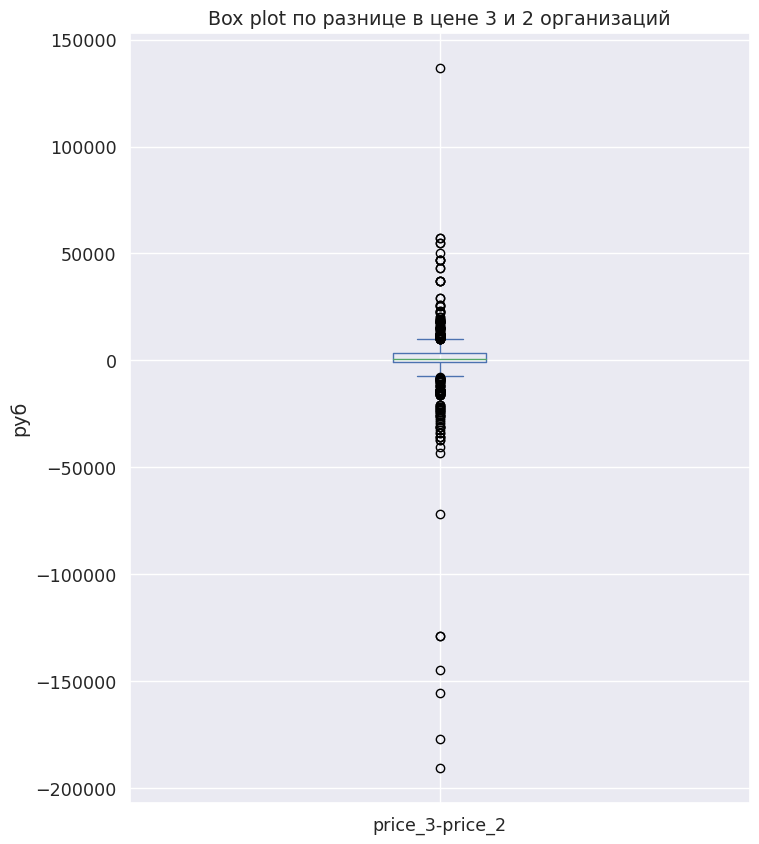

In [ ]:
df_match_2_3['price_3-price_2'].plot(kind='box', figsize=(8, 10))
plt.title('Box plot по разнице в цене 3 и 2 организаций')
plt.ylabel('руб')
plt.show()

In [ ]:
df_match_2_3.loc[df_match_2_3['price_3-price_2'] < -100000]

reduced                                   title_2  \
1052      MDTB BURGAS-1368 EK    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1368 EK   
1053      MDTB BURGAS-1368 2K    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1368 2K   
1054      MDTB BURGAS-1068 EK    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1068 EK   
1055      MDTB BURGAS-1068 2K    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1068 2K   
1058    MDTB BANKER-M 1368 EK  ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BANKER-M 1368 EK   
1059    MDTB BANKER M 1368 2K  ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BANKER M 1368 2K   

       price_2                                   title_3   price_3  \
1052  558776.0    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1368 EK  381438.0   
1053  558776.0    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1368 2K  368243.0   
1054  432827.0    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1068 EK  287975.0   
1055  432827.0    ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BURGAS-1068 2K  276979.0   
1058  478808.0  ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BANKER-M 1368 EK  349760.0   
1059  478808.0  ВЗЛОМОСТОЙКИЙ СЕЙФ MDTB BANKER M 1368 2K  349760.0   

      price_3-price_2  
1052        -177338.0  
1053        -190533.0  
1054        -144852.0  
1055        -155848.0  
1058        -129048.0  
1059        -129048.0

In [ ]:
df_match_2_3.loc[df_match_2_3['price_3-price_2'] > 50000]

reduced                                      title_2  \
918     VALBERG РУБЕЖ 99 EL GOLD  ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG РУБЕЖ 99 EL GOLD   
1033       VALBERG АЛМАЗ 1685 EL     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1685 EL   
1034       VALBERG АЛМАЗ 1685 KL     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1685 KL   
1035       VALBERG АЛМАЗ 1668 EL     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1668 EL   
1036       VALBERG АЛМАЗ 1668 KL     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1668 KL   

       price_2                                      title_3   price_3  \
918   678728.0  ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG РУБЕЖ 99 EL GOLD  815674.0   
1033  459716.0     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1685 EL  516693.0   
1034  459716.0     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1685 KL  516693.0   
1035  441723.0     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1668 EL  496701.0   
1036  441723.0     ВЗЛОМОСТОЙКИЙ СЕЙФ VALBERG АЛМАЗ 1668 KL  496701.0   

      price_3-price_2  
918          136946.0  
1033          56977.0  
1034          56977.0  
1035          54978.0  
1036          54978.0

In [ ]:
print('Цены 3 организации ниже чем у 2 для ' + str(df_match_2_3['reduced'].loc[df_match_2_3['price_3-price_2'] < 0 ].count()) + ' товаров') #цены 3 ниже 2
print('Цены равны для ' + str(df_match_2_3['reduced'].loc[df_match_2_3['price_3-price_2'] == 0].count()) + ' товаров') #цены равны
print('Цены 3 организации выше чем у 2 для ' + str(df_match_2_3['reduced'].loc[df_match_2_3['price_3-price_2'] > 0].count()) + ' товаров') #цены 3 выше 2

Цены 3 организации ниже чем у 2 для 271 товаров
Цены равны для 15 товаров
Цены 3 организации выше чем у 2 для 540 товаров


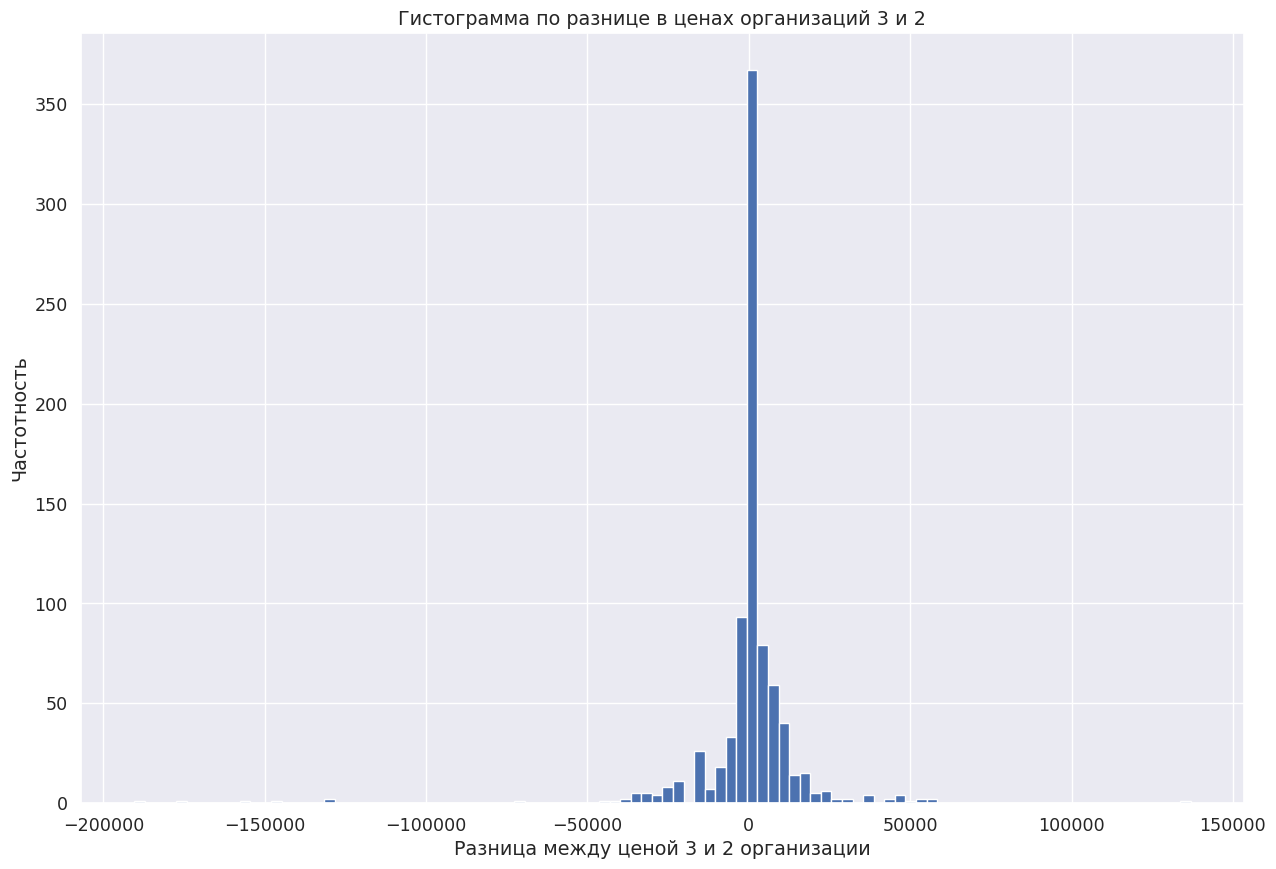

In [ ]:
df_match_2_3['price_3-price_2'].plot(kind='hist', bins=100, figsize=(15, 10))
plt.title('Гистограмма по разнице в ценах организаций 3 и 2')
plt.xlabel('Разница между ценой 3 и 2 организации')
plt.ylabel('Частотность')
plt.show()

В целом цены в организации 3 выше, чем цены на аналогичные товары в организации 2. Но в большинстве случаев цены отличаются друг от друга несильно.

In [ ]:
df_match_2_3.describe()

price_2        price_3  price_3-price_2
count     826.000000     826.000000       826.000000
mean    66012.101695   66140.736077       128.634383
std     98409.470153   94530.465740     18084.132792
min        80.000000      70.000000   -190533.000000
25%     11507.250000   12906.500000      -800.000000
50%     29114.000000   32862.000000       690.000000
75%     72946.000000   76730.500000      3496.500000
max    795182.000000  815674.000000    136946.000000

### Совпадения по 1 и 5

In [ ]:
df_match_1_5 = df_only_match.drop(['title_2', 'price_2', 'title_4', 'price_4', 'title_3', 'price_3', 'title_43', 'price_43', 'Row_Total'], axis=1)

In [ ]:
df_match_1_5.dropna (thresh= 4, inplace=True) #удаляем строки с пустотами

In [ ]:
df_match_1_5.describe()

price_1        price_5
count     394.000000     435.000000
mean    34673.756345   31760.788506
std     33232.050053   29948.813882
min      1100.000000    1180.000000
25%      9455.000000   10127.500000
50%     23370.000000   21344.000000
75%     51150.000000   42174.500000
max    191650.000000  169373.000000

In [ ]:
df_match_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 9 to 805
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title_1  457 non-null    object 
 1   reduced  457 non-null    object 
 2   price_1  394 non-null    float64
 3   title_5  457 non-null    object 
 4   price_5  435 non-null    float64
dtypes: float64(2), object(3)
memory usage: 21.4+ KB


Общее кол-во совпадений в целом по товарам было 1499. 

457 совпадений 1 и 5 организаций составляет порядка 1/3 от числа всех совпадений.

В организациях 1 и 5 общее количество товаров 10947 и 9420 соответственно. 

In [ ]:
print(f'Количество совпадений составляет {round(457*100/10947, 2)}% для организации 1 и {round(457*100/9420, 2)}% для организации 5')

Количество совпадений составляет 4.17% для организации 1 и 4.85% для организации 5


In [ ]:
df_match_1_5['price_5-price_1'] = df_match_1_5['price_5'] - df_match_1_5['price_1'] #выводим разницу в цене 5-1

In [ ]:
df_match_1_5

title_1            reduced  price_1  \
9         СЕЙФ ОФИСНЫЙ ШБМ-120/2          ШБМ-120/2  25500.0   
13           СЕЙФ ОФИСНЫЙ ШБМ-90             ШБМ-90  19480.0   
17           СЕЙФ ОФИСНЫЙ ШБМ-46             ШБМ-46  12090.0   
28         СЕЙФ ОФИСНЫЙ ШБМ-46МК           ШБМ-46МК  16460.0   
34           СЕЙФ ОФИСНЫЙ ШБМ-65             ШБМ-65  15040.0   
..                           ...                ...      ...   
801  ТУМБА ВС-015 + ТУМБА ВС-011   ВС-015 +  ВС-011      NaN   
802  ТУМБА ВС-031 + ТУМБА ВС-030   ВС-031 +  ВС-030      NaN   
803  ТУМБА ВС-037 + ТУМБА ВС-031   ВС-037 +  ВС-031      NaN   
804              ТУМБА LOGITEX 5          LOGITEX 5  51520.0   
805           ТУМБА LOGITEX 5 №1       LOGITEX 5 №1  54010.0   

                         title_5   price_5  price_5-price_1  
9         СЕЙФ ОФИСНЫЙ ШБМ-120/2   25400.0           -100.0  
13           СЕЙФ ОФИСНЫЙ ШБМ-90   19400.0            -80.0  
17           СЕЙФ ОФИСНЫЙ ШБМ-46   12000.0            -90.0  
28         СЕЙФ ОФИСНЫЙ ШБМ-46МК   16400.0            -60.0  
34           СЕЙФ ОФИСНЫЙ ШБМ-65   15000.0            -40.0  
..                           ...       ...              ...  
801  ТУМБА ВС-015 + ТУМБА ВС-011   68543.0              NaN  
802  ТУМБА ВС-031 + ТУМБА ВС-030   61465.0              NaN  
803  ТУМБА ВС-037 + ТУМБА ВС-031  114817.0              NaN  
804              ТУМБА LOGITEX 5   43365.0          -8155.0  
805           ТУМБА LOGITEX 5 №1   46129.0          -7881.0  

[457 rows x 6 columns]

In [ ]:
print('Цены 5 организации ниже чем у 1 для ' + str(df_match_1_5['reduced'].loc[df_match_1_5['price_5-price_1'] < 0 ].count()) + ' товаров') #цены 5 ниже 1
print('Цены равны для ' + str(df_match_1_5['reduced'].loc[df_match_1_5['price_5-price_1'] == 0].count()) + ' товаров') #цены равны
print('Цены  организации выше чем у 1 для ' + str(df_match_1_5['reduced'].loc[df_match_1_5['price_5-price_1'] > 0].count()) + ' товаров') #цены 5 выше 1

Цены 5 организации ниже чем у 1 для 227 товаров
Цены равны для 0 товаров
Цены  организации выше чем у 1 для 145 товаров


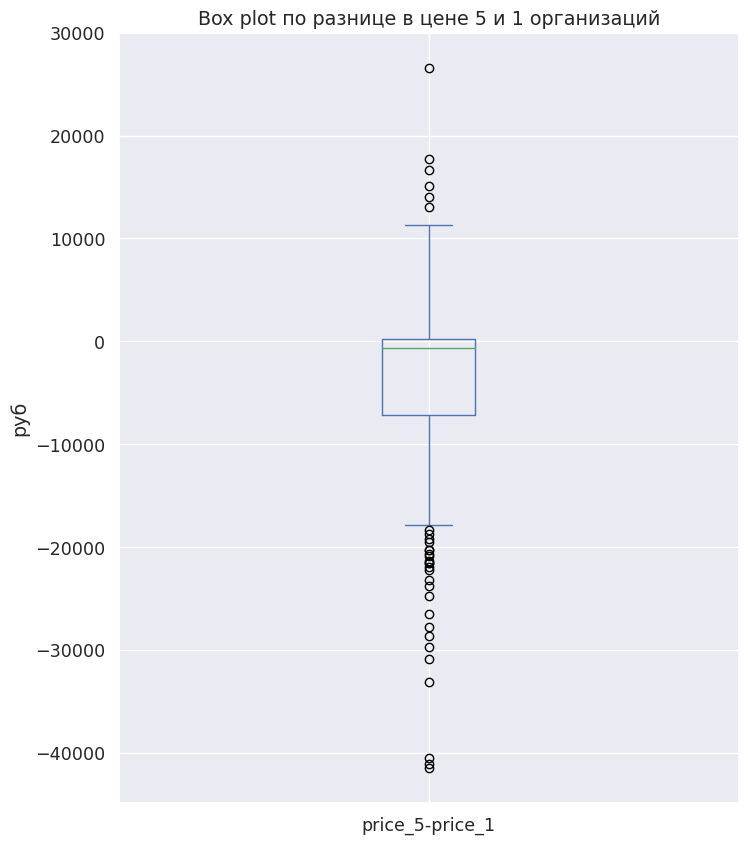

In [ ]:
df_match_1_5['price_5-price_1'].plot(kind='box', figsize=(8, 10))
plt.title('Box plot по разнице в цене 5 и 1 организаций')
plt.ylabel('руб')
plt.show()

In [ ]:
df_match_1_5.loc[df_match_1_5['price_5-price_1'] < -20000]

title_1            reduced   price_1  \
429  СИСТЕМА ХРАНЕНИЯ MODUL 2Х2000 №9    MODUL 2Х2000 №9  174190.0   
431  СИСТЕМА ХРАНЕНИЯ MODUL 3Х2000 №3    MODUL 3Х2000 №3  191650.0   
566   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-051-04          ВЛ-051-04   62090.0   
593   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-052-05          ВЛ-052-05   60950.0   
618               ШКАФ TOOLEX 106L/3S     TOOLEX 106L/3S  132250.0   
619               ШКАФ TOOLEX 206S/3S     TOOLEX 206S/3S  150180.0   
659          ВЕРСТАК WOKER WB 3200 №1   WOKER WB 3200 №1  136090.0   
710                  ТУМБЫ WOKER S №1       Ы WOKER S №1  156600.0   
723                      ТУМБА ВС-015             ВС-015   72540.0   
725                      ТУМБА ВС-030             ВС-030   49890.0   
726                      ТУМБА ВС-035             ВС-035   89670.0   
727                      ТУМБА ВС-017             ВС-017   91020.0   
728                      ТУМБА ВС-031             ВС-031   53670.0   
729                      ТУМБА ВС-037             ВС-037  120420.0   
730                      ТУМБА ВС-077             ВС-077  120690.0   
731                      ТУМБА ВС-033             ВС-033   83870.0   
733                      ТУМБА ВС-014             ВС-014   62300.0   
734                      ТУМБА ВС-034             ВС-034   76050.0   
736                ТЕЛЕЖКА ВСТ-030-01         ВСТ-030-01   59090.0   
737                ТЕЛЕЖКА ВСТ-030-02         ВСТ-030-02   78100.0   
738                ТЕЛЕЖКА ВСТ-010-01         ВСТ-010-01   54370.0   

                              title_5   price_5  price_5-price_1  
429  СИСТЕМА ХРАНЕНИЯ MODUL 2Х2000 №9  153909.0         -20281.0  
431  СИСТЕМА ХРАНЕНИЯ MODUL 3Х2000 №3  169373.0         -22277.0  
566   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-051-04   40755.0         -21335.0  
593   ШКАФ ИНСТРУМЕНТАЛЬНЫЙ ВЛ-052-05   40280.0         -20670.0  
618               ШКАФ TOOLEX 106L/3S  111318.0         -20932.0  
619               ШКАФ TOOLEX 206S/3S  126400.0         -23780.0  
659          ВЕРСТАК WOKER WB 3200 №1  114542.0         -21548.0  
710                  ТУМБЫ WOKER S №1  131800.0         -24800.0  
723                      ТУМБА ВС-015   41610.0         -30930.0  
725                      ТУМБА ВС-030   29602.0         -20288.0  
726                      ТУМБА ВС-035   56525.0         -33145.0  
727                      ТУМБА ВС-017   50445.0         -40575.0  
728                      ТУМБА ВС-031   31730.0         -21940.0  
729                      ТУМБА ВС-037   79325.0         -41095.0  
730                      ТУМБА ВС-077   79230.0         -41460.0  
731                      ТУМБА ВС-033   55195.0         -28675.0  
733                      ТУМБА ВС-014   35739.0         -26561.0  
734                      ТУМБА ВС-034   48260.0         -27790.0  
736                ТЕЛЕЖКА ВСТ-030-01   35891.0         -23199.0  
737                ТЕЛЕЖКА ВСТ-030-02   48336.0         -29764.0  
738                ТЕЛЕЖКА ВСТ-010-01   32756.0         -21614.0

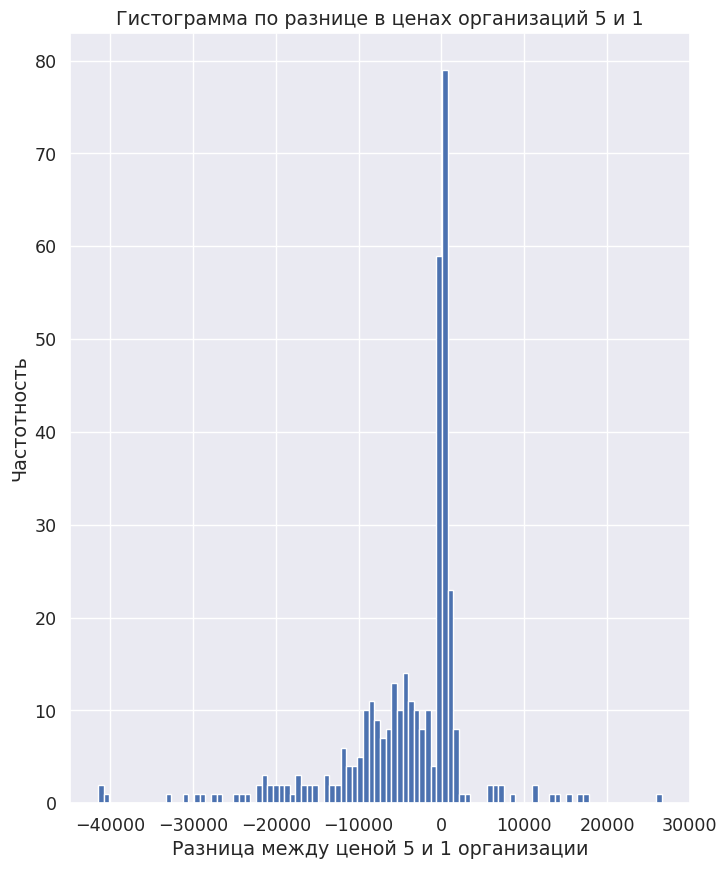

In [ ]:
df_match_1_5['price_5-price_1'].plot(kind='hist', bins=100, figsize=(8, 10))
plt.title('Гистограмма по разнице в ценах организаций 5 и 1')
plt.xlabel('Разница между ценой 5 и 1 организации')
plt.ylabel('Частотность')
plt.show()

В целом цены на аналогичные товары ниже в организации 5.

In [ ]:
df_match_1_5.describe()

price_1        price_5  price_5-price_1
count     394.000000     435.000000       372.000000
mean    34673.756345   31760.788506     -4080.228495
std     33232.050053   29948.813882      8077.398123
min      1100.000000    1180.000000    -41460.000000
25%      9455.000000   10127.500000     -7180.500000
50%     23370.000000   21344.000000      -617.500000
75%     51150.000000   42174.500000       230.000000
max    191650.000000  169373.000000     26609.000000

## Выводы по 2 части

На местном рынке сложился очень близкий ассортимент у организаций 2 и 3. Поэтому предложение с отличными модификациями товаров в рассматриваемых категориях также могут заинтересовать потенциальных заказчиков.


## Проверка гипотез

In [ ]:
df_only_match = pd.read_csv('all_only_match') #подгружаем датасет с совпадениями заново, чтобы не было нестыковок

## Выводы по 3 части

Цены товаров организации 43 от минимальных цен статистически значимо не отличаются и являются конкурентоспособными для рассматриваемого региона.

## Заключение

В настоящее время местный рынок города N. направления сейфы, стеллажи, металлическая мебель является перспективным в плане освоения. Особенно это актуально с учётом роста производства.

В данном исследовании:
1. Был проведён общий анализ ассортимента по направлению сейфов, стеллажей, металлической и производственной мебели на местном рынке города N. по специализированным организациям, имеющим оффлайн точки продаж, что позволило компании получить цельное представление о текущем положении дел;

## Рекомендации

* Для дальнейшего погружения в нишу сейфов, стеллажей и металлической мебели стоит собрать и проанализировать данные по топовым производителям оборудования.

* При запуске нового товарного направления рекомендуется вести учёт и анализ собственных продаж, а также ассортимента и цен конкурентов для своевременной корректировки.
